In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Loading and Exploring the Dataset
# Step 1: Loading the dataset
try:
    # Load the dataset with the correct encoding
    file_path = 'C:/Users/NDETO/PLP/WEEKLY ASSIGNMENTS/week-7-python-data analysis/Sample - Superstore.csv'
    data = pd.read_csv(file_path, encoding='latin1')  # Use 'latin1' or try 'cp1252' if needed
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    exit()


Dataset loaded successfully!


In [2]:
# Step 2: Displaying the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Ca

In [3]:
# Step 3: Exploring the structure of the dataset
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float6

In [4]:
# Step 4: Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [5]:
# Step 5: Cleaning the dataset (droping or filling in the  missing values)
data_cleaned = data.dropna()  # Dropping rows with missing values
print("\nData cleaned. Missing values removed.")


Data cleaned. Missing values removed.


In [6]:
# Task 2: Basic Data Analysis

# Step 1: Computing the basic statistics
print("\nBasic Statistics:")
print(data_cleaned.describe())



Basic Statistics:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [7]:
# Step 2: Performing groupings and compute means
grouped_data = data_cleaned.groupby('Category')['Sales'].mean()
print("\nAverage Sales by Category:")
print(grouped_data)


Average Sales by Category:
Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64


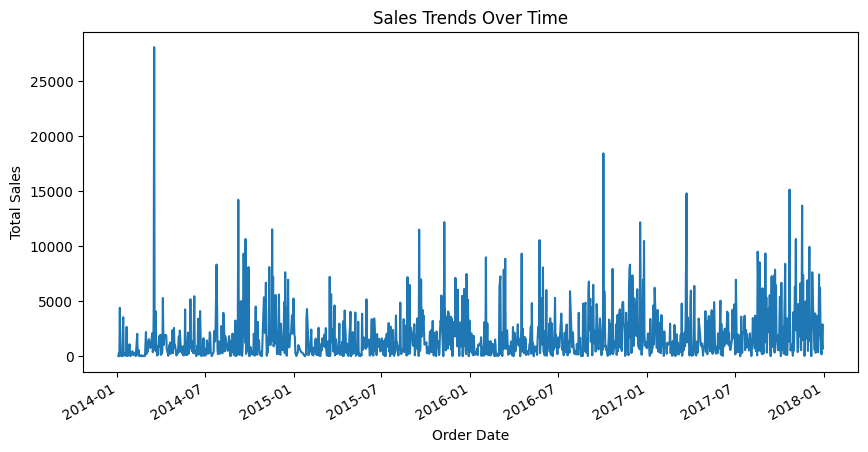

In [8]:
# Step 3: Identifying patterns or interesting findings
# Observations will be noted based on results printed above

# Task 3: Data Visualization
# Step 1: Line chart for trends over time

data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'])
time_series = data_cleaned.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(10, 5))
time_series.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()


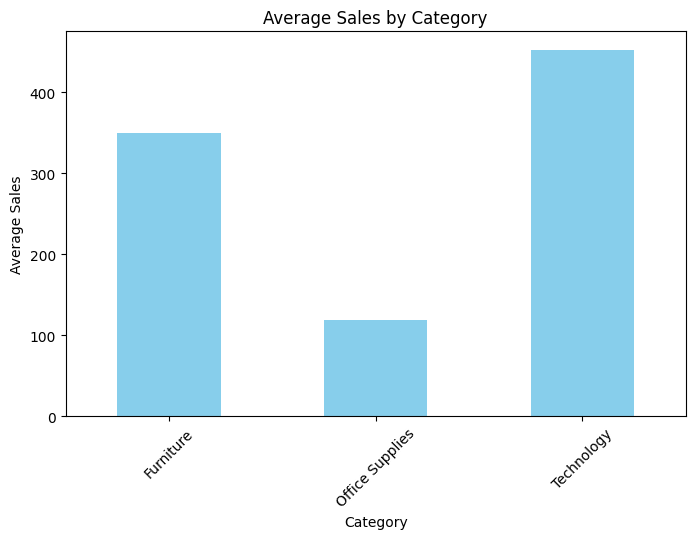

In [9]:
# Step 2: Bar chart for comparison across categories

plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


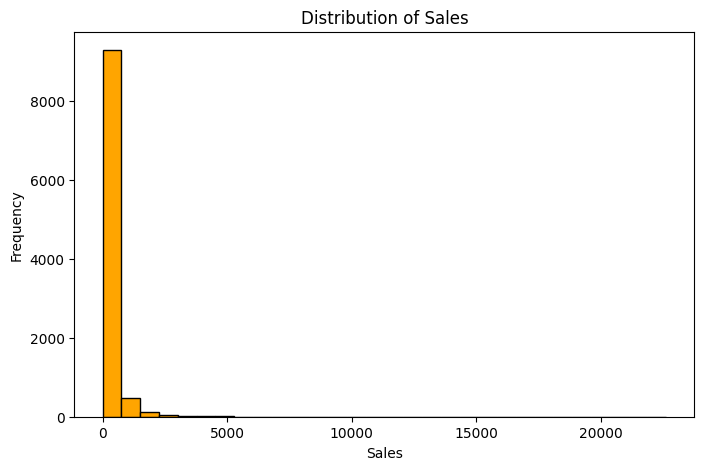

In [10]:
# Step 3: Histogram for numerical column distribution

plt.figure(figsize=(8, 5))
plt.hist(data_cleaned['Sales'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

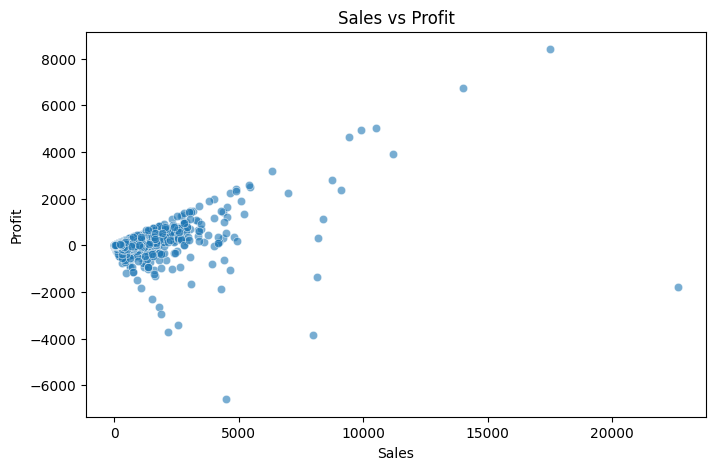

In [11]:
# Step 4: Scatter plot for relationships

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sales', y='Profit', data=data_cleaned, alpha=0.6)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()